In [4]:
from stable_baselines3.common import results_plotter
import os
import numpy as np
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
%matplotlib inline

## Robot configuration
* state : joint, ee pos, ee goal
* action : full joint

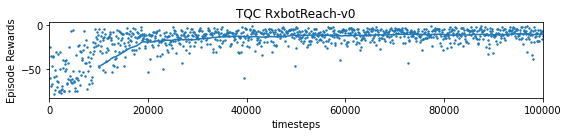

In [28]:
log_dir = "logs/sac/RxbotReach-v0_25/"
results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "TQC RxbotReach-v0")

In [29]:
b = np.load(log_dir+"evaluations.npz")

In [30]:
list(b.keys())

['timesteps', 'results', 'ep_lengths', 'successes']

In [33]:
b['timesteps']

array([ 10000,  20000,  30000,  40000,  50000,  60000,  70000,  80000,
        90000, 100000, 110000, 120000, 130000, 140000, 150000, 160000,
       170000, 180000, 190000, 200000, 210000, 220000, 230000, 240000,
       250000, 260000, 270000, 280000, 290000, 300000, 310000, 320000,
       330000])

In [32]:
b['successes']

array([[False, False, False, False, False],
       [False, False, False, False, False],
       [False, False, False, False, False],
       [ True, False, False,  True, False],
       [False, False,  True,  True,  True],
       [False, False, False, False,  True],
       [False, False, False, False,  True],
       [False, False,  True, False,  True],
       [False, False, False, False, False],
       [ True, False, False,  True, False],
       [False, False, False,  True, False],
       [False, False, False, False,  True],
       [ True, False, False, False, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False],
       [False, False,  True, False,  True],
       [False, False, False, False,  True],
       [ True, False, False, False, False],
       [False, False, False,  True,  True],
       [False, False,  True, False, False],
       [False, False, False,  True,  True],
       [False, False, False,  True, False],
       [False, False, False,  Tr

### exp
* reward: task
* model: TQC+HER
* basic hyperparameter.
* random init
* task_ll = [0, -1, 0], task_ul = [1, 1, 1]
* joint_range = $2\pi$

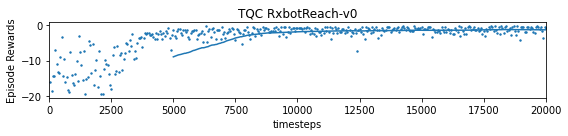

In [5]:
log_dir = "rl-trained-agents/tqc/RxbotReach-v0_1/"
results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "TQC RxbotReach-v0")

### exp
* reward: task
* model: SAC+HER
* basic hyperparameter.
* random init
* task_ll = [0, -1, 0], task_ul = [1, 1, 1]
* joint_range = $2\pi$

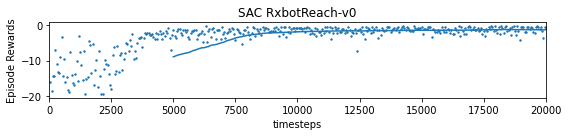

In [6]:
log_dir2 = "rl-trained-agents/sac/RxbotReach-v0_2/"
results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "SAC RxbotReach-v0")

### exp
* reward: task
* model: SAC+HER
* basic hyperparameter.
* random init
* task_ll = [-1, -1, 0], task_ul = [1, 1, 1]
* joint_range = $2\pi$

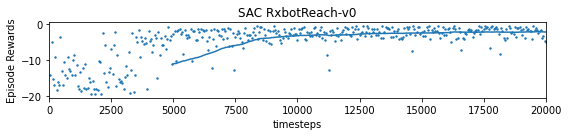

In [7]:
log_dir = "rl-trained-agents/sac/RxbotReach-v0_3/"
results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "SAC RxbotReach-v0")

### exp
* reward: task + joint reward at to farr
* model: SAC+HER
* basic hyperparameter.
* random init
* task_ll = [-1, -1, 0], task_ul = [1, 1, 1]
* joint_range = $2\pi$

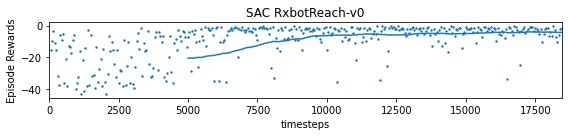

In [8]:
log_dir = "rl-trained-agents/sac/RxbotReach-v0_10/"
results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "SAC RxbotReach-v0")

### exp
* reward: task
* model: SAC+HER
* basic hyperparameter.
* random init
* task_ll = [-1, -1, 0], task_ul = [1, 1, 1]
* joint_range = $2\pi * 3/4$

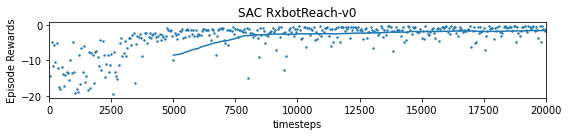

In [10]:
log_dir = "rl-trained-agents/sac/RxbotReach-v0_11/"
results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "SAC RxbotReach-v0")

## 4r robot

### exp
* reward: task
* model: SAC+HER
* basic hyperparameter.
* random init
* task_ll = [-1, -1, 0], task_ul = [1, 1, 1]
* joint_range = $2\pi * 3/4$

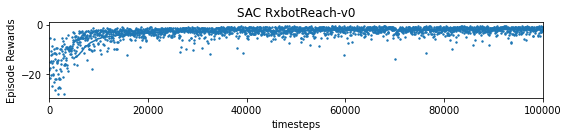

In [11]:
log_dir = "rl-trained-agents/sac/RxbotReach-v0_13/"
results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "SAC RxbotReach-v0")

### exp
* reward: task+action
* model: SAC+HER
* basic hyperparameter.
* random init
* task_ll = [-1, -1, 0], task_ul = [1, 1, 1]
* joint_range = $2\pi * 3/4$

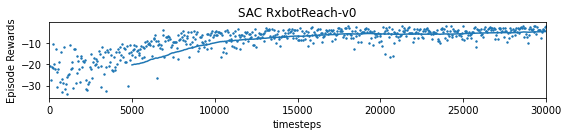

In [3]:
log_dir = "rl-trained-agents/sac/RxbotReach-v0_15/"
results_plotter.plot_results([log_dir], 1e5, results_plotter.X_TIMESTEPS, "SAC RxbotReach-v0")

In [38]:
import gym
import utils.rxbot.rxbot_reach
from stable_baselines3 import SAC
from sb3_contrib import TQC
from stable_baselines3.common.vec_env import DummyVecEnv, VecNormalize
from sb3_contrib.common.wrappers import TimeFeatureWrapper
from stable_baselines3.common.env_util import make_vec_env

In [40]:
log_dir = "rl-trained-agents/sac/RxbotReach-v0_2/"

# import model
env = make_vec_env("RxbotReach-v0")
env = VecNormalize.load(log_dir+"RxbotReach-v0/vecnormalize.pkl", env)
#  do not update them at test time
env.training = False
# reward normalization is not needed at test time
env.norm_reward = False
model = SAC.load("rl-trained-agents/sac/RxbotReach-v0_2/RxbotReach-v0.zip", env)

C:\Users\apple\anaconda3\lib\site-packages\gym\logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))
